# Twitter Airline Sentiment Analysis Exploratory Data Analysis

The dataset is available [here](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) on Kaggle. It is a record of tweets about airlines in US. Along with other information, it contains ID of Tweet, sentiment of tweer ( neutral, negative and positive), reason for negative tweet, name of airline and text of tweet. 
Here it is posed as a binary classififcation problem by converting neutral and positve into one category. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:95%!important;width:auto!important;}</style>"))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use("dark_background")
# sns.set_palette("dark")
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
DF = pd.read_csv("Dataset/tweets.csv")
DF.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Most relevant features in Dataset:**

1.tweet_id :  ID of tweet

2.airline_sentiment : The sentiment of tweet. It can be positive or negative or neutral

3.negativereason : its a categorical feature showing reason of negative tweet

4.airline : Name of airline. Categorical feature with six values

5.text : contents of tweet

6.tweet_coord : lattitude and longitude of tweeter user

In [4]:
DF.shape

(14640, 15)

### Finding and removing duplicates

In [5]:
duplicateDFRow = DF[DF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(72, 15)

**There are 72 duplicate rows in Dataset**

In [6]:
duplicateDFRow.head(6)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12001,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12162,570272018840428544,neutral,1.0,NaN,NaN,American,NaN,pokecrastinator,NaN,0,@AmericanAir I thought all those planes were r...,NaN,2015-02-24 09:20:19 -0800,United States,Mountain Time (US & Canada)
12159,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11998,570272880556011520,positive,1.0,NaN,NaN,American,NaN,ESPartee,NaN,0,"@americanair new plane, #gogo, easy power for ...","[0.0, 0.0]",2015-02-24 09:23:44 -0800,"alexandria, va",Eastern Time (US & Canada)
11997,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)
12158,570273710210469888,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir These are some awesome photos. Th...,NaN,2015-02-24 09:27:02 -0800,Virginia,Eastern Time (US & Canada)


In [7]:
#removing duplicates
DF.drop_duplicates(keep='first',inplace=True)

In [8]:
duplicateDFRow = DF[DF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape[0]

0

In [9]:
# New shape
DF.shape

(14604, 15)

### New Dataframe with selected features

In [10]:
# new Dataframe with selected features
twDF=DF[['tweet_id','airline_sentiment','negativereason','airline','text','tweet_coord']]
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text,tweet_coord
0,570306133677760513,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.,NaN
1,570301130888122368,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...,NaN
2,570301083672813571,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...,NaN
3,570301031407624196,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...,NaN
4,570300817074462722,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...,NaN


In [11]:
twDF.shape

(14604, 6)

In [12]:
#There are duplicates
duplicateDFRow = twDF[twDF.duplicated(keep=False)]
duplicateDFRow.sort_values("tweet_id", inplace = True)
duplicateDFRow.shape

(144, 6)

In [13]:
# Removing duplicates
twDF.drop_duplicates(keep='first',inplace=True)

In [14]:
duplicateDFRow = twDF[twDF.duplicated(keep=False)]
duplicateDFRow.shape[0]

0

In [15]:
twDF.shape

(14532, 6)

In [16]:
twDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14532 entries, 0 to 14639
Data columns (total 6 columns):
tweet_id             14532 non-null int64
airline_sentiment    14532 non-null object
negativereason       9118 non-null object
airline              14532 non-null object
text                 14532 non-null object
tweet_coord          1010 non-null object
dtypes: int64(1), object(5)
memory usage: 794.7+ KB


There are null values in dataset

In [17]:
#There are no records where sentiment is negative and a reason is not given
twDF[twDF['airline_sentiment']=='negative'].loc[twDF['negativereason'].isnull()].shape[0]

0

There are no records where sentiment is negative and a reason is not given

In [18]:
#There are no records where sentiment is positive or neutral and a reason is given
twDF[twDF['airline_sentiment']!='negative'].loc[twDF['negativereason'].notnull()].shape[0]

0

There are no records where sentiment is positive or neutral and a reason is given

## Plotting

### Pie chart for Airline Sentiments

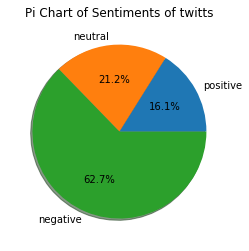

In [19]:
ST = twDF.groupby('airline_sentiment').agg('count')
plt.pie(ST.tweet_id.sort_values(), labels=ST.tweet_id.sort_values().index,autopct='%1.1f%%', shadow=True )
plt.title("Pi Chart of Sentiments of twitts")
plt.show()

**Observations:**

1.There are more negative sentiments than positve and neutral combined

2.There are more neutral sentiments than positive sentiments

3.It may be because peolple feel the need to expressed themselves more when they have bad experience of airline than when they have good experience.

### Number of tweets for every Airline

Text(0.5, 1.0, 'Number of tweets for every Airline')

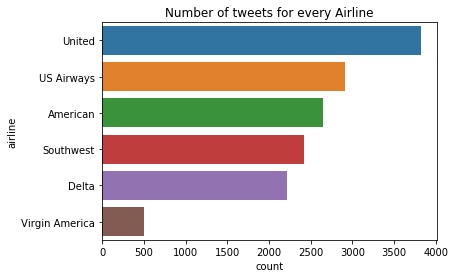

In [20]:
#number of tweets
sns.countplot(data=twDF,y=twDF['airline'],order = twDF['airline'].value_counts().index).set_title('Number of tweets for every Airline')

**Observations:**

1.United Airline has maximum number of tweets.

2.Virgin America Airline has minimum number of tweets.


Text(0.5, 1.0, 'Number of tweets for every Airline with sentiment distribution')

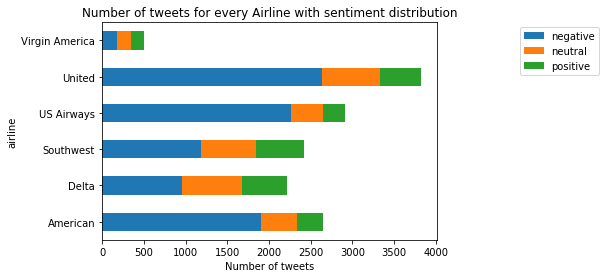

In [21]:
types = twDF.groupby("airline")['airline_sentiment'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel("Number of tweets")
plt.title("Number of tweets for every Airline with sentiment distribution")

**Observations:**

1.United Airline has more number of negative tweets than neutral and positive combined.It is same for US Airways and American airways.

2.This imbalance is not so bad for Southwest and Delta Airline

3.Virgin America Airline has almost similar number of negative, neutral and positive tweets.


Text(0.5, 1.0, 'Distribution of Number of negative tweets for every Airline')

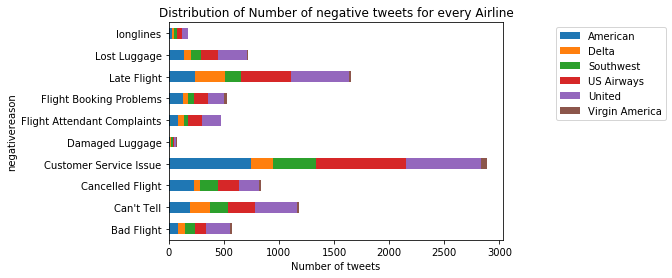

In [22]:
types = twDF.groupby("negativereason")['airline'].value_counts(normalize=False).sort_index()
types.unstack().plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Distribution of Number of negative tweets for every Airline')

**Observations:**

1.More number of people have suffered from Customer Serive than any other reason

2.Least number of people have suffered from damaged luggage and longliness

3.There are considerable number of people who are suffering and cant tell a reason. They might be going through some existential/identity/midlife crisis.


Text(0.5, 1.0, 'Percentage wise Distribution of Number of negative tweets for every Airline')

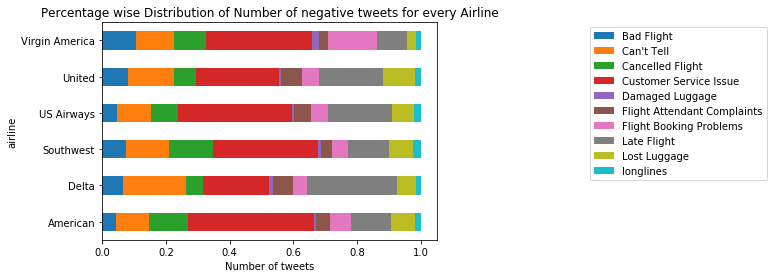

In [23]:
types = twDF.groupby("airline")['negativereason'].value_counts(normalize=True).unstack()
types.plot(kind='barh', stacked='True')
plt.legend(bbox_to_anchor=(2, 1), loc='upper right')
plt.xlabel('Number of tweets')
plt.title('Percentage wise Distribution of Number of negative tweets for every Airline')

**Observations:**

1.Delta and united airlines have better customer service than other airlines

2.Virgin America need to seriously introspect when it comes to flight booking problems

3.Your luggage is more safe while traveling with Virgin America

4.Here,We dont have any information about whether we ever get back our lost luggage while traveling.

5.Delta passangers are suffering more from late flights than any other reason. Dont wait for flight to become full. Just take off !!!


### Locations of Tweeter users on Map

In [24]:
import folium
import re
myCord=twDF['tweet_coord'].dropna().tolist()
Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[0])
map1 = folium.Map(location=[Num[0],Num[1]], zoom_start=2)
for i in range(1, len(myCord)):
    Num=re.findall(r"[-+]?\d*\.\d+|\d+", myCord[i])
    folium.Marker([Num[0],Num[1]], icon=folium.Icon(color='red', icon='glyphicon glyphicon-user',size=2)).add_to(map1)
map1

**Observations:**

1.Maximum number of tweets have come from North America


In [25]:
#twDF.to_csv("Dataset/tweets_deduplicated.csv")

# Preprocessing Text feature

In [26]:
twDF=twDF.drop(['tweet_coord'],axis=1)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text
0,570306133677760513,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


In [27]:
# Remove @ with Airline names
twDF['text']=twDF['text'].str.replace('@VirginAmerica','')
twDF['text']=twDF['text'].str.replace('@united','')
twDF['text']=twDF['text'].str.replace('@SouthwestAir','')
twDF['text']=twDF['text'].str.replace('@JetBlue','')
twDF['text']=twDF['text'].str.replace('@AmericanAir','')
twDF['text']=twDF['text'].str.replace('@USAirways','')
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text
0,570306133677760513,neutral,NaN,Virgin America,What @dhepburn said.
1,570301130888122368,positive,NaN,Virgin America,plus you've added commercials to the experien...
2,570301083672813571,neutral,NaN,Virgin America,I didn't today... Must mean I need to take an...
3,570301031407624196,negative,Bad Flight,Virgin America,"it's really aggressive to blast obnoxious ""en..."
4,570300817074462722,negative,Can't Tell,Virgin America,and it's a really big bad thing about it


### Decontractions

In [28]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

### Stopwords

In [29]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [30]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('http"', ' ')          # added later
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [31]:
# Create a new column for clean text
twDF['text_clean']=preprocess_text(twDF['text'].values)

100%|██████████████████████████████████████████████████████████████████████████| 14532/14532 [00:01<00:00, 8871.32it/s]


In [32]:
# drop the original column of text
twDF=twDF.drop(['text'],axis=1)

In [33]:
twDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14532 entries, 0 to 14639
Data columns (total 5 columns):
tweet_id             14532 non-null int64
airline_sentiment    14532 non-null object
negativereason       9118 non-null object
airline              14532 non-null object
text_clean           14532 non-null object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


**Observations:**

1.There are null values in negativereason column

2.It corresponds to records with neutral or positive reasons


In [34]:
twDF[twDF['text_clean'].isna()]

,tweet_id,airline_sentiment,negativereason,airline,text_clean


In [35]:
twDF.loc[twDF['tweet_id']==570083063331319808]

,tweet_id,airline_sentiment,negativereason,airline,text_clean
781,570083063331319808,positive,NaN,United,


In [36]:
# Merge neutral and positive sentiments in one category
twDF['airline_sentiment']=twDF['airline_sentiment'].str.replace('neutral','positive')

In [37]:
# convert class label into numerical number
# 1 is used for negative tweets so that it will reflect in recall score
twDF['airline_sentiment'].replace(to_replace='positive', value=0, inplace=True)
twDF['airline_sentiment'].replace(to_replace='negative', value=1, inplace=True)
twDF.head()

,tweet_id,airline_sentiment,negativereason,airline,text_clean
0,570306133677760513,0,NaN,Virgin America,dhepburn said
1,570301130888122368,0,NaN,Virgin America,plus added commercials experience tacky
2,570301083672813571,0,NaN,Virgin America,not today must mean need take another trip
3,570301031407624196,1,Bad Flight,Virgin America,really aggressive blast obnoxious entertainmen...
4,570300817074462722,1,Can't Tell,Virgin America,really big bad thing


In [38]:
# twDF.to_csv("Dataset/tweets_preprocessed.csv")

## Analysis of frequency of words

In [39]:
txt = ' '.join(twDF['text_clean'])
txt=txt.split()
freq_cnt = pd.Series(txt).value_counts()
type(freq_cnt)


pandas.core.series.Series

In [40]:
freq_DF = freq_cnt.to_frame()

In [41]:
freq_DF.tail()

,0
choosekind,1
xvbjczlmda,1
temper,1
aygaoeb6uu,1
itravelalot,1


In [42]:
freq=twDF['text_clean'].str.split(expand=True).stack().value_counts().to_frame()
freq.rename(columns = {0:'count'}, inplace = True) 
   
freq.head()

,count
flight,3904
not,3638
no,1489
get,1334
co,1206


**Observations:**

1.Flight is the most frequently used word in tweets

In [43]:
print("Total number of words in Corpus are ",freq['count'].sum())

Total number of words in Corpus are  143479


In [44]:
print("Total number of words that has appeared more than 3000 times in Corpus are ",freq.loc[freq['count']>3000].shape[0])
print("Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are ",freq.loc[freq['count']<=3000].loc[freq['count']>2500].shape[0])
print("Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are ",freq.loc[freq['count']<=2500].loc[freq['count']>2000].shape[0])
print("Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are ",freq.loc[freq['count']<=2000].loc[freq['count']>1500].shape[0])
print("Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are ",freq.loc[freq['count']<=1500].loc[freq['count']>1000].shape[0])
print("Total number of words that has appeared less than 1000 times and more than 500 times in Corpus are ",freq.loc[freq['count']<=1000].loc[freq['count']>500].shape[0])
print("Total number of words that has appeared less than 500 times and more than 400 times in Corpus are ",freq.loc[freq['count']<=500].loc[freq['count']>400].shape[0])
print("Total number of words that has appeared less than 400 times and more than 300 times in Corpus are ",freq.loc[freq['count']<=400].loc[freq['count']>300].shape[0])
print("Total number of words that has appeared less than 300 times and more than 200 times in Corpus are ",freq.loc[freq['count']<=300].loc[freq['count']>200].shape[0])
print("Total number of words that has appeared less than 200 times and more than 100 times in Corpus are ",freq.loc[freq['count']<=200].loc[freq['count']>100].shape[0])
print("Total number of words that has appeared less than 100 times and more than 50 times in Corpus are ",freq.loc[freq['count']<=100].loc[freq['count']>50].shape[0])
print("Total number of words that has appeared less than 50 times and more than 25 times in Corpus are ",freq.loc[freq['count']<=50].loc[freq['count']>25].shape[0])
print("Total number of words that has appeared less than 25 times and more than 15 times in Corpus are ",freq.loc[freq['count']<=25].loc[freq['count']>15].shape[0])
print("Total number of words that has appeared less than 15 times and more than 10 times in Corpus are ",freq.loc[freq['count']<=15].loc[freq['count']>10].shape[0])
print("Total number of words that has appeared less than 10 times and more than 5 times in Corpus are ",freq.loc[freq['count']<=10].loc[freq['count']>5].shape[0])
print("Total number of words that has appeared less than 5 times and more than 3 times in Corpus are ",freq.loc[freq['count']<=5].loc[freq['count']>3].shape[0])
print("Total number of words that has appeared 3 times in Corpus are ",freq.loc[freq['count']==3].shape[0])
print("Total number of words that has appeared 2 times in Corpus are ",freq.loc[freq['count']==2].shape[0])
print("Total number of words that has appeared 1 times in Corpus are ",freq.loc[freq['count']==1].shape[0])

Total number of words that has appeared more than 3000 times in Corpus are  2
Total number of words that has appeared less than 3000 times and more than 2500 times in Corpus are  0
Total number of words that has appeared less than 2500 times and more than 2000 times in Corpus are  0
Total number of words that has appeared less than 2000 times and more than 1500 times in Corpus are  0
Total number of words that has appeared less than 1500 times and more than 1000 times in Corpus are  6
Total number of words that has appeared less than 1000 times and more than 500 times in Corpus are  21
Total number of words that has appeared less than 500 times and more than 400 times in Corpus are  9
Total number of words that has appeared less than 400 times and more than 300 times in Corpus are  25
Total number of words that has appeared less than 300 times and more than 200 times in Corpus are  52
Total number of words that has appeared less than 200 times and more than 100 times in Corpus are  133

**Observations:**

1.flight and not are the two words that are used for more than 3000 times 

2.There are 8643 words which have apppeared only once. its not good for modeling.


Text(0.5, 1.0, 'Number of words with there frequency of appearance')

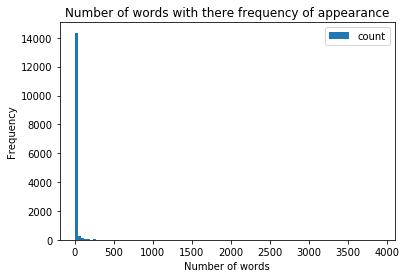

In [45]:
freq.plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency of appearance")

**Observations:**

1.Its a very imbalanced distribution.

2.There are very large number of words that have appeared very very few times.

Text(0.5, 1.0, 'Number of words with there frequency less than 500')

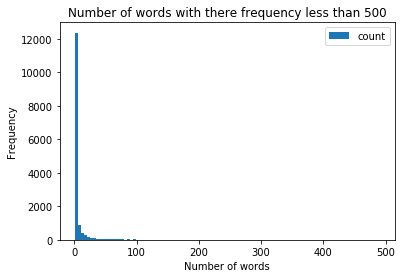

In [46]:
freq.loc[freq['count']<500].plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 500")

Text(0.5, 1.0, 'Number of words with there frequency less than 100')

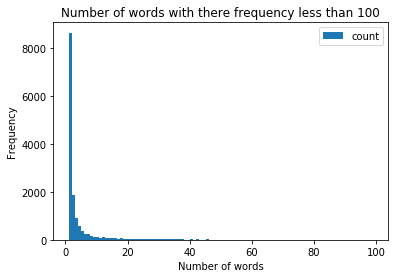

In [47]:
freq.loc[freq['count']<100].plot.hist(bins=100)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 100")

Text(0.5, 1.0, 'Number of words with there frequency less than 50')

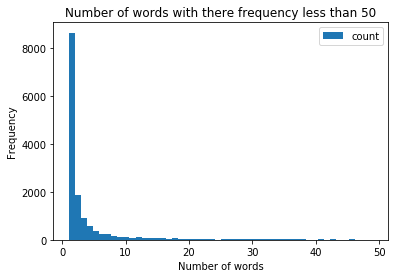

In [48]:
freq.loc[freq['count']<50].plot.hist(bins=50)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 50")

Text(0.5, 1.0, 'Number of words with there frequency less than 20')

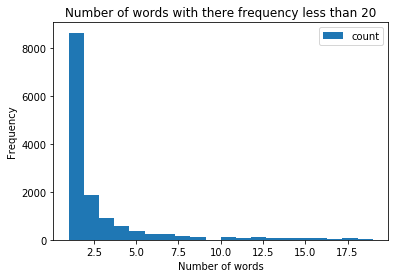

In [49]:
freq.loc[freq['count']<20].plot.hist(bins=20)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 20")

Text(0.5, 1.0, 'Number of words with there frequency less than 10')

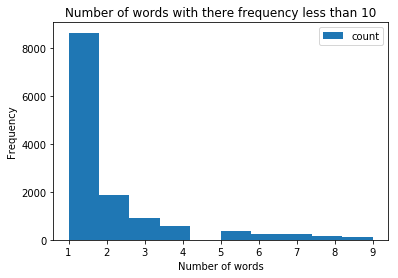

In [50]:
freq.loc[freq['count']<10].plot.hist(bins=10)
plt.xlabel("Number of words")
plt.title("Number of words with there frequency less than 10")

**Observations:**

1.There are 8643 words which have apppeared only once.

2. After that the plot falls very sharply. Never to rise again


In [51]:
freq.tail(50)

,count
chl,1
salem,1
marsha,1
resell,1
6a,1
portlandjetport,1
absorber,1
dorm,1
5db9esbnzg,1
capabilities,1


**Observations:**

1.These are the words that have appeared only once in entire corpus

2.Sometimes the entries are just cat typing(When your cat decides to walk across your keyboard).

3.Many words are just misspelled

4.One one person refers to his wife as wifey. Its a common word and We dont have a way to stem it.

5.Why would someone talk about volkswagen while telling his/her traveling experience

6.Only one person plannng a protest is a bad bad idea


## Wordclouds

In [52]:
text = " ".join(review for review in twDF['text_clean'])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 919015 words in the combination of all review.


### Wordcloud for entire corpus

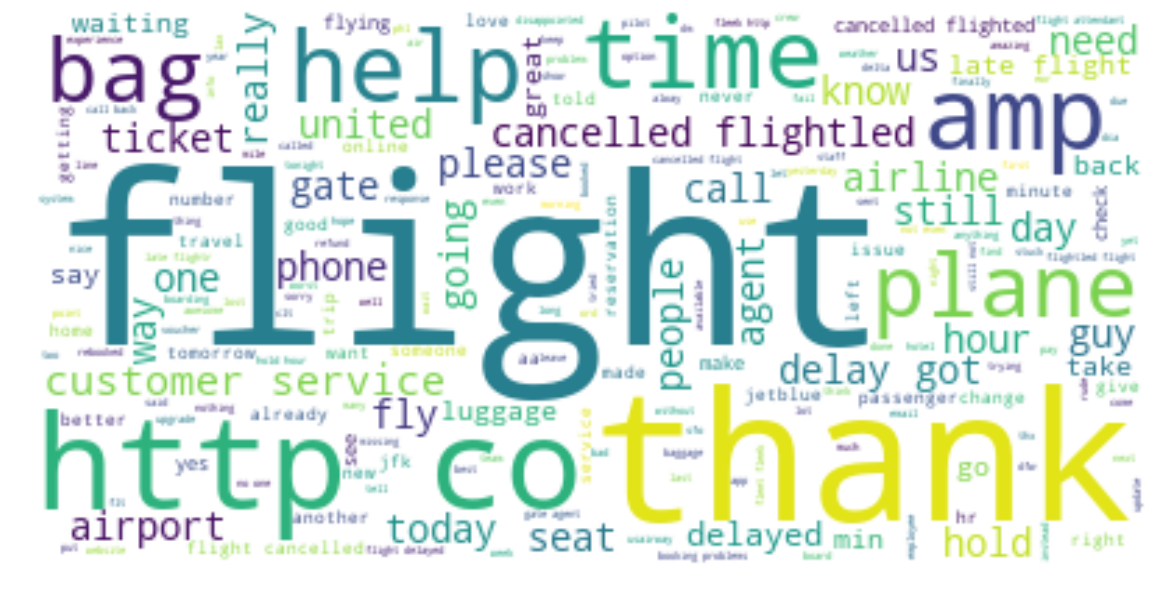

In [53]:
from wordcloud import WordCloud 
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud for records with negative sentiment

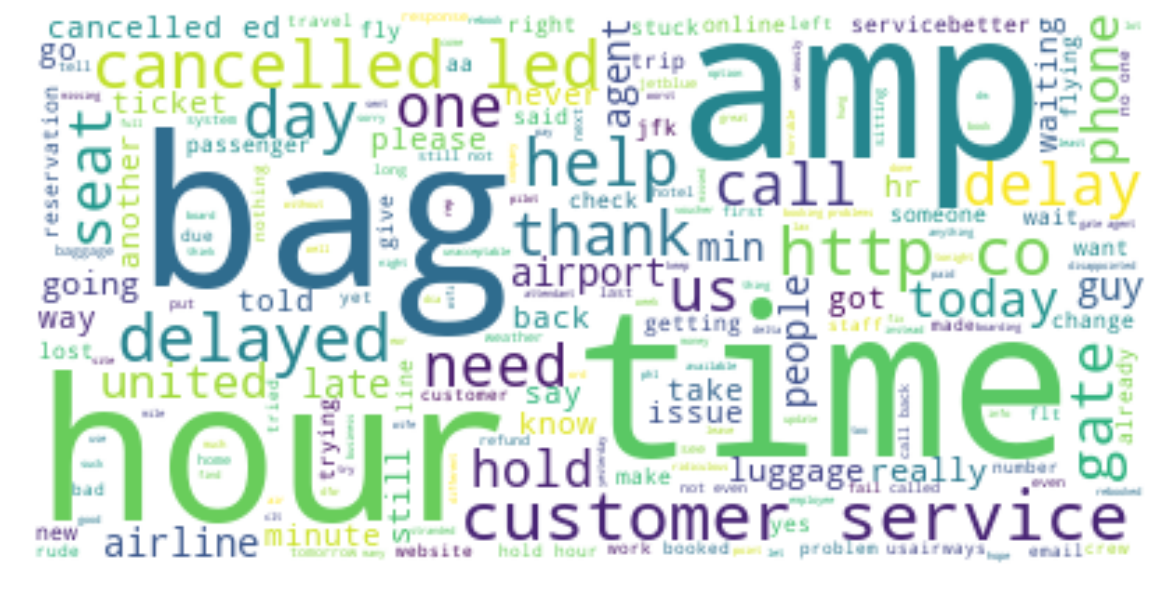

In [55]:
#negative cloud
textNeg = " ".join(review for review in twDF['text_clean'].loc[twDF['airline_sentiment']==1])
textNeg=textNeg.replace('flight', '')
textNeg=textNeg.replace('plane', '')
wordcloud = WordCloud(background_color="white").generate(textNeg)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observations:**

1.Some are is shouting "BAG". Because the have lost it.

2.Flight is late and some are counting hours. And some are refering time

3.People tend to [amp](https://slangit.com/meaning/amp) when they want to make their point while suffering.

4.People are complaining about customer service, delayed/cancelled flights


### Wordcloud for records with positive sentiment

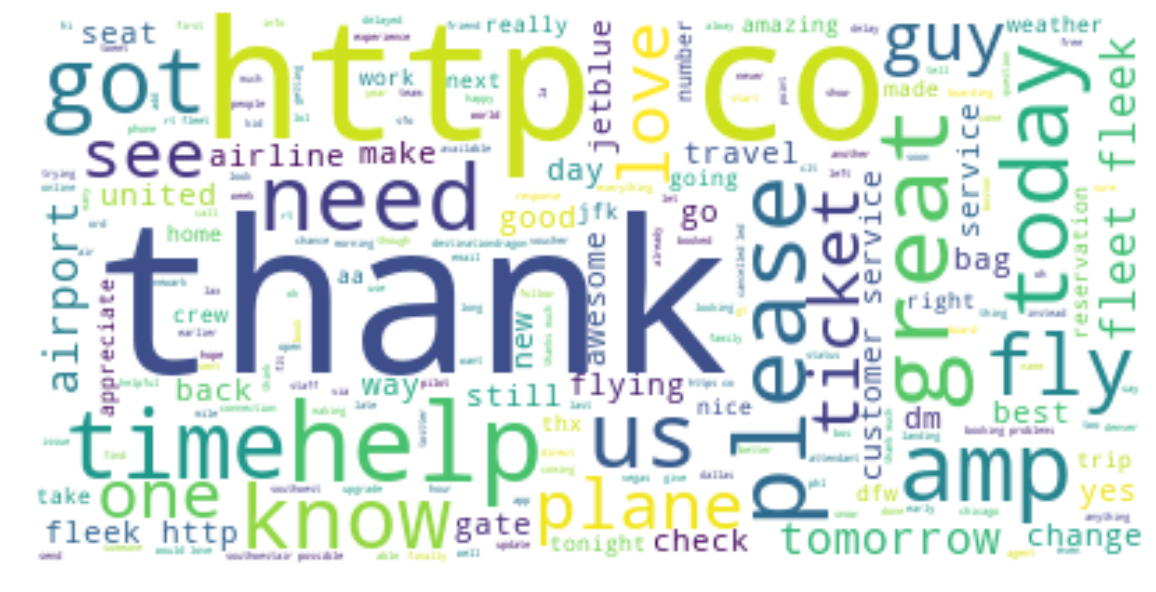

In [56]:
#positive cloud
textPos = " ".join(review for review in twDF['text_clean'].loc[twDF['airline_sentiment']==0])
textPos=textPos.replace('flight', '')
#textPos=textPos.replace('http', '')
wordcloud = WordCloud(background_color="white").generate(textPos)
plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Observations:**

1.People like to say thank you when they are happy with airline.


In [58]:
jupyter trust C:\Users\Ashutosh\Twitter US Airline Sentiment classification\EDA-twitter-US-airline-Sentiment-Analysis.ipynb

SyntaxError: invalid syntax (<ipython-input-58-ce64c0447b0e>, line 1)